# Mini Project - Sketching

## Section 1 - Function Implementation

### Import

In [4]:
import mmh3
import BitVector as bv

For this MP, you will be using the [mmh3 hash](https://pypi.org/project/mmh3/). This hash is very efficient and great for real world data although ironically the data provided and used by the autograder will be using it in exactly the wrong context. To quote the authors:

*As MurMur3 creates a fairly big print (128 bits), so it’s not recommended to use it for hashing small data sets like words, short strings, integers and so on. The embedded hash functions for these simple and small data types provide excellent performance with low collision rate. So anything that is less than a couple dozen, or preferably hundreds of bytes is not a good candidate.*

### Hash Functions

In [5]:
#INPUT:
# A hashable datatype (probably string) value containing the object being hashed
# An optional integer argument seed storing the seed to provide mmh3
#OUTPUT:
# An integer value containing the output hash value for the input object

def seededHash(value, seed=None):
    if seed:
        return mmh3.hash(value, seed)
    return mmh3.hash(value)

In [6]:
#INPUT:
# A set (inSet) storing the collection of hashable values that define a single object
# An integer (k) storing the number of hash minima you need to keep track of
# An optional argument (seed) which sets the random seed used to generate the hash function
#OUTPUT:
# A set of integers storing the k-minimum hash values produced by passing each item in inSet through seededHash
def minHash(inSet, k, seed=None):
    #YOUR CODE HERE
    hash_val = []
    for val in inSet:
        hash_val.append(seededHash(val, seed))
    hash_val.sort()
    return set(hash_val[:k])

In [7]:
#INPUT:
# A set (inSet) storing the collection of hashable values that define a single object
# An integer (m) storing the size of the bloom filter being constructed
# Two optional integer arguments (hs1 and hs2) storing hash seeds for the BF's first and second hash
#OUTPUT:
# A BitVector of size m containing all input items hashed using both hs1 and hs2 seeds
def bloomFilter(inSet, m, hs1=0, hs2=10):
    bitvec = bv.BitVector(size=m)
    for val in inSet:
        idx1 = seededHash(val, hs1) % m
        idx2 = seededHash(val, hs2) % m
        bitvec[idx1] = 1
        bitvec[idx2] = 1
    return bitvec

In [8]:
#INPUT:
# Two input sets (inSet1 and inSet2) containing sets of the same hashable data type
#OUTPUT:
# A float value between 0 and 1 corresponding to the Jaccard similarity between input sets
# NOTE: You can use this function to calculate the exact similarity between raw datasets
# and also the Minhash similarity (since a Minhash sketch is *literally* just a set)
def jaccard(inSet1, inSet2):
    #YOUR CODE HERE
    intersec = len(inSet1.intersection(inSet2))
    # print(intersec)
    union = len(inSet1.union(inSet2))
    # print(union)
    return intersec/union

In [9]:
#INPUT:
# Two input BitVectors (bf1 and bf2) containing two equal length bloom filters
#OUTPUT:
# A float value between 0 and 1 corresponding to the Jaccard similarity between input sets
def bf_jaccard(bf1, bf2):
    intersect = (bf1 & bf2).count_bits()
    union = (bf1.count_bits() + bf2.count_bits()) - intersect
    
    return intersect / union

In [10]:
#INPUT:
# A BitVector object bf, containing a bloom filter
# A hashable data type (probably string) val, containing the value being searched for
# Two optional integer arguments storing hash seeds for the BF's first and second hash
#OUTPUT:
# A bool (True or False) based on whether or not val is present in BF.
# NOTE: The Bloom Filter is probabilistic and some of the time will return 'True' 
# even if the item is not present.
def bf_find(bf, val, hs1=0, hs2=10):
    hash1 = seededHash(val, hs1) % len(bf)
    hash2 = seededHash(val, hs2) % len(bf)

    if bf[hash1] == 1 and bf[hash2] == 1:
        return True
    else:
        return False

### Test

Run-Code

In [11]:
# An example on how to use seededHash
print(seededHash('From', seed=4))

s1 = set(["1", "2", "3", "4", "5", "6", "7", "8"])
s2 = set(["11", "12", "13", "4", "5", "16", "17", "18"])
s3 = set(["11", "12", "13", "24", "25", "6", "17", "18"])

k = 3
mh1 = minHash(s1, k)
mh2 = minHash(s2, k)
mh3 = minHash(s3, k)

m = 50
bf1 = bloomFilter(s1, m)
bf2 = bloomFilter(s2, m)
bf3 = bloomFilter(s3, m)

print("raw:", jaccard(s1, s2)) #0.14285714285714285
print("mh:", jaccard(mh1, mh2)) #0.0
print("bf:", bf_jaccard(bf1, bf2)) #0.21739130434782608

print("raw:", jaccard(s1, s3)) # 0.06666666666666667
print("mh:",jaccard(mh1, mh3)) # 0.0
print("bf:",bf_jaccard(bf1, bf3)) #0.16666666666666666

print("raw:",jaccard(s2, s3)) # 0.45454545454545453
print("mh:",jaccard(mh2, mh3)) # 0.5
print("bf:",bf_jaccard(bf2, bf3)) # 0.5555555555555556

# BF will 100% of the time give the correct answer for items that exist
findValue = "11"
print(bf_find(bf1,findValue))
print(bf_find(bf2, findValue))
print(bf_find(bf3, findValue))

# A small percentage of the time it will think an item exists that was not in the set
findValue = "9"
print(bf_find(bf1,findValue))
print(bf_find(bf2, findValue))
print(bf_find(bf3, findValue))


601558399
raw: 0.14285714285714285
mh: 0.0
bf: 0.21739130434782608
raw: 0.06666666666666667
mh: 0.0
bf: 0.16666666666666666
raw: 0.45454545454545453
mh: 0.5
bf: 0.5555555555555556
False
True
True
True
False
False


### Sample input from text files

Here's an example of a dataset analysis of just two items (using fixed values of k and m)! You should not use these same values without considering or testing alternatives, they likely won't work for your dataset.

In [12]:
dataset0 = set()
dataset1 = set()

with open("data/stringSet_0.txt") as myFile: #Open the file as a 'reader'
    for line in myFile: # For each line in the file
        if line: # A simple way to write 'if line exists' (is non empty)
            line = line.strip()
            dataset0.add(line)
            
with open("data/stringSet_1.txt") as myFile: #Open the file as a 'reader'
    for line in myFile: # For each line in the file
        if line: # A simple way to write 'if line exists' (is non empty)
            line = line.strip()
            dataset1.add(line)

k = 10
mh0 = minHash(dataset0, k)
mh1 = minHash(dataset1, k)

m = 6000 
bf0 = bloomFilter(dataset0, m)
bf1 = bloomFilter(dataset1, m)

print("raw:", jaccard(dataset0, dataset1)) #0.3309557774607703
print("mh:", jaccard(mh0, mh1)) #When k= 10, 0.3333333333333333
print("bf:", bf_jaccard(bf0, bf1)) #When m=6000, 0.48413747521480505

raw: 0.3309557774607703
mh: 0.3333333333333333
bf: 0.48413747521480505


## Section 2 - Dataset Exploration

### Dateset Link

I plan to visualize the similarity between each song lyrics. 

Link: https://www.kaggle.com/datasets/paultimothymooney/poetry


### Dataset Format

I would use five songs (bieber.txt, bruno-mars.txt, rihanna.txt, michael-jackson.txt, and adele.txt) as a unique object where the lyrics in the song are the features to be compared. The data format will be the text file format, and separate each word by whitespace. The total count number in each song will be the estimated size of bloom filters, and try different values of k for minhash sketchings to approach the best one that has the most similarity. I will show the process by visualizing the bar graph to be more clear in similarity and use the final input value for k and m as my input to export to three tables.

### Import

In [13]:
import os 
import string

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import Dataset

In [14]:
dataset0 = set()
dataset1 = set()
dataset2 = set()
dataset3 = set()
dataset4 = set()

# 1. Adele.txt
with open("data/adele.txt") as myFile:
    for line in myFile: 
        if line: 
            line = line.translate(str.maketrans('', '', string.punctuation))
            line = line.strip().split(' ')
            for word in line:
                dataset0.add(word)

# 2. Bieber.txt
with open("data/bieber.txt") as myFile:
    for line in myFile: 
        if line: 
            line = line.translate(str.maketrans('', '', string.punctuation))
            line = line.strip().split(' ')
            for word in line:
                dataset1.add(word)

# 3. Bruno-mars.txt
with open("data/bruno-mars.txt") as myFile:
    for line in myFile: 
        if line: 
            line = line.translate(str.maketrans('', '', string.punctuation))
            line = line.strip().split(' ')
            for word in line:
                dataset2.add(word)

# 4. Michael-jackson.txt                
with open("data/michael-jackson.txt") as myFile:
    for line in myFile: 
        if line: 
            line = line.translate(str.maketrans('', '', string.punctuation))
            line = line.strip().split(' ')
            for word in line:
                dataset3.add(word)

# 5. rihanna.txt                
with open("data/rihanna.txt") as myFile:
    for line in myFile: 
        if line: 
            line = line.translate(str.maketrans('', '', string.punctuation))
            line = line.strip().split(' ')
            for word in line:
                dataset4.add(word)

### First Table - Raw Data

#### Jaccard Similarity for each pair of objects using raw data 

In [15]:
# import 
d01 = jaccard(dataset0, dataset1)
d02 = jaccard(dataset0, dataset2)
d03 = jaccard(dataset0, dataset3)
d04 = jaccard(dataset0, dataset4)
d12 = jaccard(dataset1, dataset2)
d13 = jaccard(dataset1, dataset3)
d14 = jaccard(dataset1, dataset4)
d23 = jaccard(dataset2, dataset3)
d24 = jaccard(dataset2, dataset4)
d34 = jaccard(dataset3, dataset4)

d00 = jaccard(dataset0, dataset0)
d11 = jaccard(dataset1, dataset1)
d22 = jaccard(dataset2, dataset2)
d33 = jaccard(dataset3, dataset3)
d44 = jaccard(dataset4, dataset4)

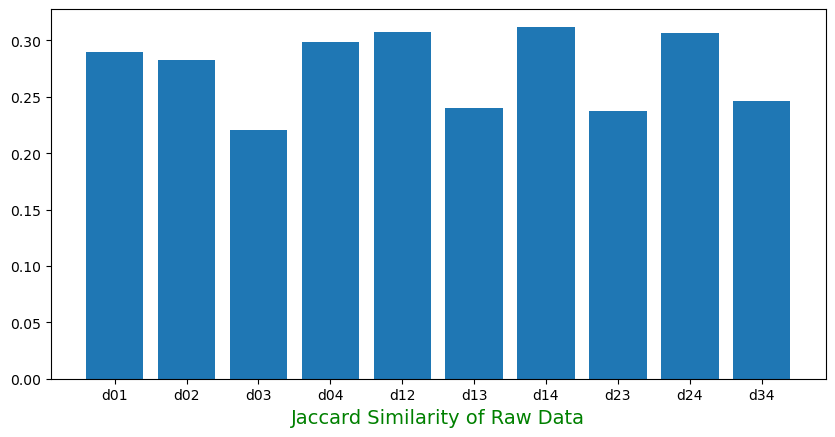

In [16]:
height = [d01, d02, d03, d04, d12, d13, d14, d23, d24, d34]
bars = ('d01', 'd02', 'd03', 'd04', 'd12', 'd13', 'd14', 'd23', 'd24', 'd34')
y_pos = np.arange(len(bars))

plt.figure().set_figwidth(10)
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Jaccard Similarity of Raw Data', color='green', fontsize='14', horizontalalignment='center')
plt.show()

In [17]:
df = pd.DataFrame({"Dataset0":[d00, d01, d02, d03, d04],
                   "Dataset1":[d01, d11, d12, d13, d14],
                   "Dataset2":[d02, d12, d22, d23, d24],
                   "Dataset3":[d03, d13, d23, d33, d34],
                   "Dataset4":[d04, d14, d24, d34, d44]})

df.index = ['Dataset0', 'Dataset1', 'Dataset2', 'Dataset3', 'Dataset4']
df

,Dataset0,Dataset1,Dataset2,Dataset3,Dataset4
Dataset0,1.000000,0.289405,0.282754,0.220419,0.298828
Dataset1,0.289405,1.000000,0.307293,0.240516,0.312150
Dataset2,0.282754,0.307293,1.000000,0.237779,0.306157
Dataset3,0.220419,0.240516,0.237779,1.000000,0.246271
Dataset4,0.298828,0.312150,0.306157,0.246271,1.000000


In [18]:
# Generate LaTex Table
df.to_latex('rawData.tex', index=False)

/var/folders/tx/vfxw8ljd3_57rz58qxf02pm80000gn/T/ipykernel_14424/729374614.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex('rawData.tex', index=False)


### Second Table - minHash Sketches
#### Jaccard Similarity for each pair of objects using minhash sketches. 


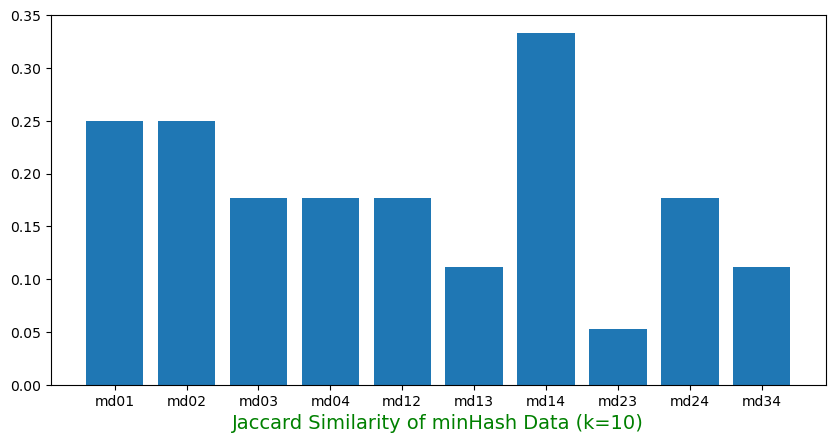

In [19]:
# minHash Sketches k = 10
k = 10
mh0 = minHash(dataset0, k)
mh1 = minHash(dataset1, k)
mh2 = minHash(dataset2, k)
mh3 = minHash(dataset3, k)
mh4 = minHash(dataset4, k)

md01 = jaccard(mh0, mh1)
md02 = jaccard(mh0, mh2)
md03 = jaccard(mh0, mh3)
md04 = jaccard(mh0, mh4)
md12 = jaccard(mh1, mh2)
md13 = jaccard(mh1, mh3)
md14 = jaccard(mh1, mh4)
md23 = jaccard(mh2, mh3)
md24 = jaccard(mh2, mh4)
md34 = jaccard(mh3, mh4)

height = [md01, md02, md03, md04, md12, md13, md14, md23, md24, md34]
bars = ('md01', 'md02', 'md03', 'md04', 'md12', 'md13', 'md14', 'md23', 'md24', 'md34')
y_pos = np.arange(len(bars))

plt.figure().set_figwidth(10)
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Jaccard Similarity of minHash Data (k=10)', color='green', fontsize='14', horizontalalignment='center')
plt.show()

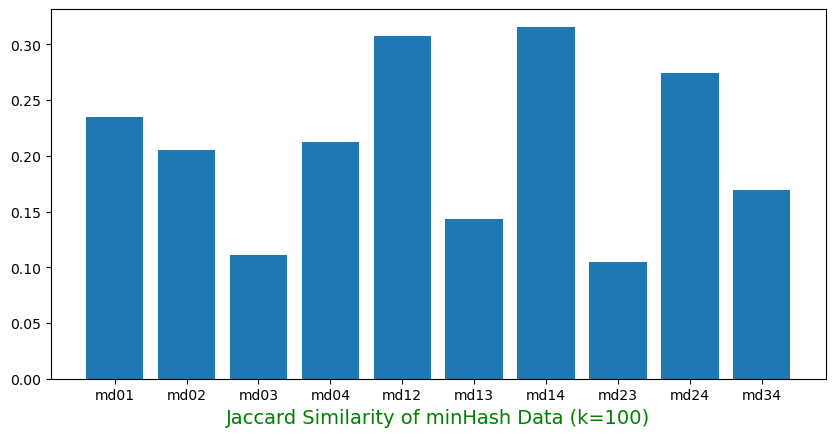

In [20]:
# minHash Sketches k = 100
k = 100
mh0 = minHash(dataset0, k)
mh1 = minHash(dataset1, k)
mh2 = minHash(dataset2, k)
mh3 = minHash(dataset3, k)
mh4 = minHash(dataset4, k)

md01 = jaccard(mh0, mh1)
md02 = jaccard(mh0, mh2)
md03 = jaccard(mh0, mh3)
md04 = jaccard(mh0, mh4)
md12 = jaccard(mh1, mh2)
md13 = jaccard(mh1, mh3)
md14 = jaccard(mh1, mh4)
md23 = jaccard(mh2, mh3)
md24 = jaccard(mh2, mh4)
md34 = jaccard(mh3, mh4)

height = [md01, md02, md03, md04, md12, md13, md14, md23, md24, md34]
bars = ('md01', 'md02', 'md03', 'md04', 'md12', 'md13', 'md14', 'md23', 'md24', 'md34')
y_pos = np.arange(len(bars))

plt.figure().set_figwidth(10)
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Jaccard Similarity of minHash Data (k=100)', color='green', fontsize='14', horizontalalignment='center')
plt.show()

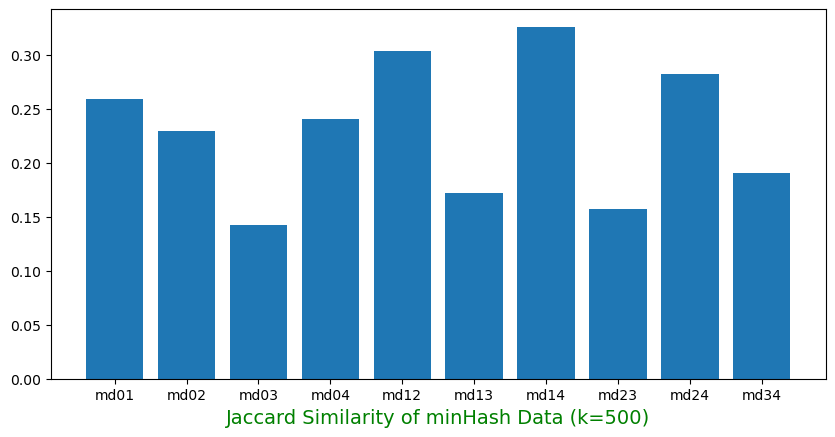

In [21]:
# minHash Sketches k = 500
k = 500
mh0 = minHash(dataset0, k)
mh1 = minHash(dataset1, k)
mh2 = minHash(dataset2, k)
mh3 = minHash(dataset3, k)
mh4 = minHash(dataset4, k)

md01 = jaccard(mh0, mh1)
md02 = jaccard(mh0, mh2)
md03 = jaccard(mh0, mh3)
md04 = jaccard(mh0, mh4)
md12 = jaccard(mh1, mh2)
md13 = jaccard(mh1, mh3)
md14 = jaccard(mh1, mh4)
md23 = jaccard(mh2, mh3)
md24 = jaccard(mh2, mh4)
md34 = jaccard(mh3, mh4)

height = [md01, md02, md03, md04, md12, md13, md14, md23, md24, md34]
bars = ('md01', 'md02', 'md03', 'md04', 'md12', 'md13', 'md14', 'md23', 'md24', 'md34')
y_pos = np.arange(len(bars))

plt.figure().set_figwidth(10)
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Jaccard Similarity of minHash Data (k=500)', color='green', fontsize='14', horizontalalignment='center')
plt.show()

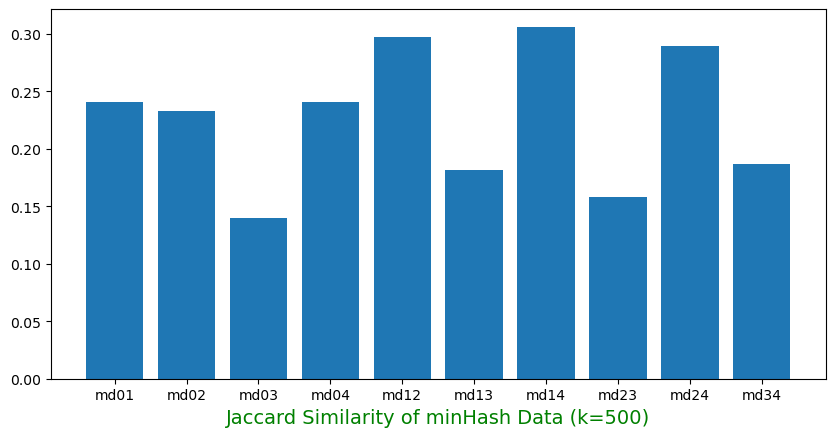

In [22]:
# minHash Sketches k = 1000
k = 1000
mh0 = minHash(dataset0, k)
mh1 = minHash(dataset1, k)
mh2 = minHash(dataset2, k)
mh3 = minHash(dataset3, k)
mh4 = minHash(dataset4, k)

md01 = jaccard(mh0, mh1)
md02 = jaccard(mh0, mh2)
md03 = jaccard(mh0, mh3)
md04 = jaccard(mh0, mh4)
md12 = jaccard(mh1, mh2)
md13 = jaccard(mh1, mh3)
md14 = jaccard(mh1, mh4)
md23 = jaccard(mh2, mh3)
md24 = jaccard(mh2, mh4)
md34 = jaccard(mh3, mh4)

height = [md01, md02, md03, md04, md12, md13, md14, md23, md24, md34]
bars = ('md01', 'md02', 'md03', 'md04', 'md12', 'md13', 'md14', 'md23', 'md24', 'md34')
y_pos = np.arange(len(bars))

plt.figure().set_figwidth(10)
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Jaccard Similarity of minHash Data (k=500)', color='green', fontsize='14', horizontalalignment='center')
plt.show()

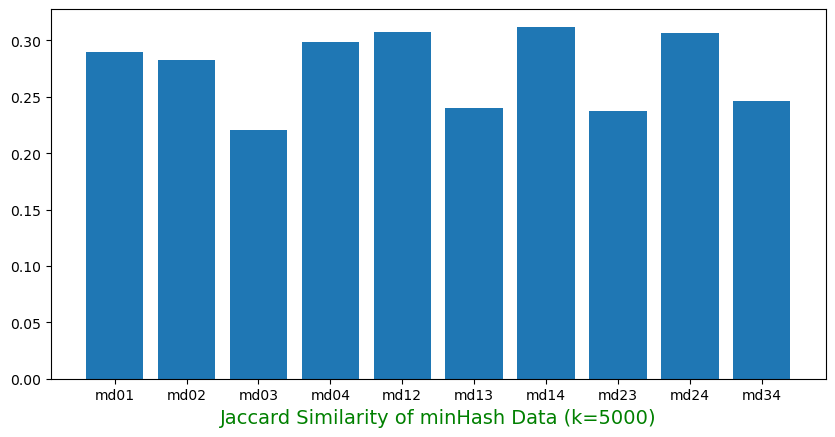

In [23]:
# minHash Sketches k = 5000
k = 5000
mh0 = minHash(dataset0, k)
mh1 = minHash(dataset1, k)
mh2 = minHash(dataset2, k)
mh3 = minHash(dataset3, k)
mh4 = minHash(dataset4, k)

md01 = jaccard(mh0, mh1)
md02 = jaccard(mh0, mh2)
md03 = jaccard(mh0, mh3)
md04 = jaccard(mh0, mh4)
md12 = jaccard(mh1, mh2)
md13 = jaccard(mh1, mh3)
md14 = jaccard(mh1, mh4)
md23 = jaccard(mh2, mh3)
md24 = jaccard(mh2, mh4)
md34 = jaccard(mh3, mh4)

height = [md01, md02, md03, md04, md12, md13, md14, md23, md24, md34]
bars = ('md01', 'md02', 'md03', 'md04', 'md12', 'md13', 'md14', 'md23', 'md24', 'md34')
y_pos = np.arange(len(bars))

plt.figure().set_figwidth(10)
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Jaccard Similarity of minHash Data (k=5000)', color='green', fontsize='14', horizontalalignment='center')
plt.show()

#### Justification for my choice in value for k

I have used five values for k, such as 10, 100, 500, 1000, and 5000. From the bar graph shown above, there is a higher similarity when k is equal to 5000 (also equal to the value for raw data). Therefore, I created the table using k equal to 5000 below.

In [24]:
df_minhash = pd.DataFrame({"Dataset0":[jaccard(mh0, mh0), md01, md02, md03, md04],
                   "Dataset1":[md01, jaccard(mh1, mh1), md12, md13, md14],
                   "Dataset2":[md02, md12, jaccard(mh2, mh2), md23, md24],
                   "Dataset3":[md03, md13, md23, jaccard(mh3, mh3), md34],
                   "Dataset4":[md04, md14, md24, md34, jaccard(mh4, mh4)]})

df_minhash.index = ['Dataset0', 'Dataset1', 'Dataset2', 'Dataset3', 'Dataset4']
df_minhash

,Dataset0,Dataset1,Dataset2,Dataset3,Dataset4
Dataset0,1.000000,0.289405,0.282754,0.220419,0.298828
Dataset1,0.289405,1.000000,0.307293,0.240516,0.312150
Dataset2,0.282754,0.307293,1.000000,0.237779,0.306157
Dataset3,0.220419,0.240516,0.237779,1.000000,0.246271
Dataset4,0.298828,0.312150,0.306157,0.246271,1.000000


In [25]:
# Generate LaTex Table
df_minhash.to_latex('minHash.tex', index=False)

/var/folders/tx/vfxw8ljd3_57rz58qxf02pm80000gn/T/ipykernel_14424/1474341534.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_minhash.to_latex('minHash.tex', index=False)


### Third Table - Bloom Filter
#### Jaccard Similarity for earch pair of objects using bloom filter sketches.

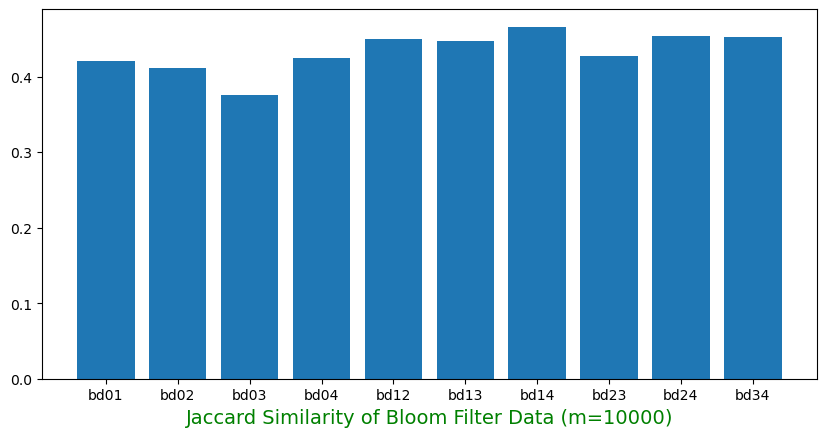

In [26]:
# Bloom Filter m = 10000
m = 10000
bf0 = bloomFilter(dataset0, m)
bf1 = bloomFilter(dataset1, m)
bf2 = bloomFilter(dataset2, m)
bf3 = bloomFilter(dataset3, m)
bf4 = bloomFilter(dataset4, m)

bd01 = bf_jaccard(bf0, bf1)
bd02 = bf_jaccard(bf0, bf2)
bd03 = bf_jaccard(bf0, bf3)
bd04 = bf_jaccard(bf0, bf4)
bd12 = bf_jaccard(bf1, bf2)
bd13 = bf_jaccard(bf1, bf3)
bd14 = bf_jaccard(bf1, bf4)
bd23 = bf_jaccard(bf2, bf3)
bd24 = bf_jaccard(bf2, bf4)
bd34 = bf_jaccard(bf3, bf4)

height = [bd01, bd02, bd03, bd04, bd12, bd13, bd14, bd23, bd24, bd34]
bars = ('bd01', 'bd02', 'bd03', 'bd04', 'bd12', 'bd13', 'bd14', 'bd23', 'bd24', 'bd34')
y_pos = np.arange(len(bars))

plt.figure().set_figwidth(10)
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Jaccard Similarity of Bloom Filter Data (m=10000)', color='green', fontsize='14', horizontalalignment='center')
plt.show()

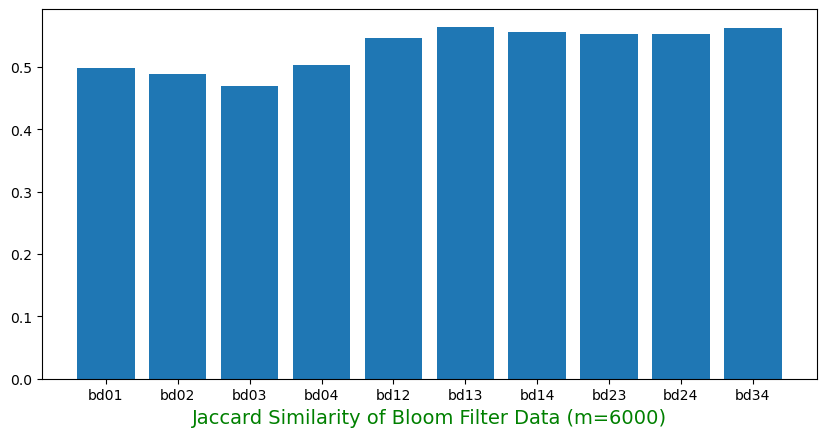

In [27]:
# Bloom Filter m = 6000
m = 6000
bf0 = bloomFilter(dataset0, m)
bf1 = bloomFilter(dataset1, m)
bf2 = bloomFilter(dataset2, m)
bf3 = bloomFilter(dataset3, m)
bf4 = bloomFilter(dataset4, m)

bd01 = bf_jaccard(bf0, bf1)
bd02 = bf_jaccard(bf0, bf2)
bd03 = bf_jaccard(bf0, bf3)
bd04 = bf_jaccard(bf0, bf4)
bd12 = bf_jaccard(bf1, bf2)
bd13 = bf_jaccard(bf1, bf3)
bd14 = bf_jaccard(bf1, bf4)
bd23 = bf_jaccard(bf2, bf3)
bd24 = bf_jaccard(bf2, bf4)
bd34 = bf_jaccard(bf3, bf4)

height = [bd01, bd02, bd03, bd04, bd12, bd13, bd14, bd23, bd24, bd34]
bars = ('bd01', 'bd02', 'bd03', 'bd04', 'bd12', 'bd13', 'bd14', 'bd23', 'bd24', 'bd34')
y_pos = np.arange(len(bars))

plt.figure().set_figwidth(10)
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Jaccard Similarity of Bloom Filter Data (m=6000)', color='green', fontsize='14', horizontalalignment='center')
plt.show()

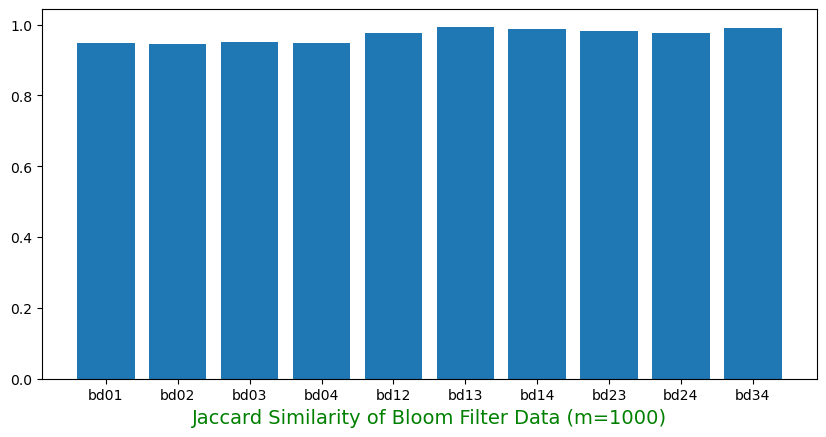

In [28]:
# Bloom Filter m = 1000
m = 1000
bf0 = bloomFilter(dataset0, m)
bf1 = bloomFilter(dataset1, m)
bf2 = bloomFilter(dataset2, m)
bf3 = bloomFilter(dataset3, m)
bf4 = bloomFilter(dataset4, m)

bd01 = bf_jaccard(bf0, bf1)
bd02 = bf_jaccard(bf0, bf2)
bd03 = bf_jaccard(bf0, bf3)
bd04 = bf_jaccard(bf0, bf4)
bd12 = bf_jaccard(bf1, bf2)
bd13 = bf_jaccard(bf1, bf3)
bd14 = bf_jaccard(bf1, bf4)
bd23 = bf_jaccard(bf2, bf3)
bd24 = bf_jaccard(bf2, bf4)
bd34 = bf_jaccard(bf3, bf4)

height = [bd01, bd02, bd03, bd04, bd12, bd13, bd14, bd23, bd24, bd34]
bars = ('bd01', 'bd02', 'bd03', 'bd04', 'bd12', 'bd13', 'bd14', 'bd23', 'bd24', 'bd34')
y_pos = np.arange(len(bars))

plt.figure().set_figwidth(10)
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Jaccard Similarity of Bloom Filter Data (m=1000)', color='green', fontsize='14', horizontalalignment='center')
plt.show()

#### Justification for my choice in value for m

I have used three values for m, such as 1000, 6000, and 10000. From the bar graphs shown above, there is a higher similarity when m is equal to 1000. Therefore, I created the table using m equal to 1000 below.

In [29]:
df_bloomFilter = pd.DataFrame({"Dataset0":[bf_jaccard(bf0, bf0), bd01, bd02, bd03, bd04],
                   "Dataset1":[bd01, bf_jaccard(bf1, bf1), bd12, bd13, bd14],
                   "Dataset2":[bd02, bd12, bf_jaccard(bf2, bf2), bd23, bd24],
                   "Dataset3":[bd03, bd13, bd23, bf_jaccard(bf3, bf3), bd34],
                   "Dataset4":[bd04, bd14, bd24, bd34,bf_jaccard(bf4, bf4)]})

df_bloomFilter.index = ['Dataset0', 'Dataset1', 'Dataset2', 'Dataset3', 'Dataset4']
df_bloomFilter

,Dataset0,Dataset1,Dataset2,Dataset3,Dataset4
Dataset0,1.000000,0.947896,0.944612,0.950,0.946841
Dataset1,0.947896,1.000000,0.975000,0.994,0.986987
Dataset2,0.944612,0.975000,1.000000,0.981,0.975952
Dataset3,0.950000,0.994000,0.981000,1.000,0.991000
Dataset4,0.946841,0.986987,0.975952,0.991,1.000000


In [30]:
# Generate LaTex Table
df_bloomFilter.to_latex('bloomFilter.tex', index=False)

/var/folders/tx/vfxw8ljd3_57rz58qxf02pm80000gn/T/ipykernel_14424/3697310728.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_bloomFilter.to_latex('bloomFilter.tex', index=False)


#### Additiontional Practice 

More efficient method to create minHash table

In [31]:
k = 50
n_datasets = 5
datasets = [dataset0, dataset1, dataset2, dataset3, dataset4]
min_hashes = [minHash(dataset, k) for dataset in datasets]

data = {}
for i in range(n_datasets):
    for j in range(i, n_datasets):
        md = jaccard(min_hashes[i], min_hashes[j])
        data[f'Dataset{i}'] = data.get(f'Dataset{i}', []) + [md]
        if i != j:
            data[f'Dataset{j}'] = data.get(f'Dataset{j}', []) + [md]

df = pd.DataFrame(data)
df.index = [f'Dataset{i}' for i in range(n_datasets)]
df

,Dataset0,Dataset1,Dataset2,Dataset3,Dataset4
Dataset0,1.000000,0.265823,0.234568,0.111111,0.219512
Dataset1,0.265823,1.000000,0.250000,0.149425,0.282051
Dataset2,0.234568,0.250000,1.000000,0.123596,0.234568
Dataset3,0.111111,0.149425,0.123596,1.000000,0.176471
Dataset4,0.219512,0.282051,0.234568,0.176471,1.000000
